In [1]:
import pickle
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import cv2
import numpy as np
from collections import Counter
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
def pick_first(loaded_list):
    new_list = []
    for item in loaded_list:
        try:
            number = int(item[0])
            new_list.append(number)
        except:
            new_list.append(-1)
    return new_list

In [26]:
def pick_first_two(loaded_list):
    new_list = []
    for item in loaded_list:
        try:
            number = int(item[:2])
            new_list.append(number)
        except:
            new_list.append(-1)
    return new_list

def pick_first_three(loaded_list):
    new_list = []
    for item in loaded_list:
        try:
            number = int(item[:3])
            new_list.append(number)
        except:
            new_list.append(-1)
    return new_list

In [4]:
with open('zip_lists_9968.pkl', 'rb') as f:
    zip_load_list = pickle.load(f)

with open('image_lists_9968.pkl', 'rb') as f:
    image_load_list = pickle.load(f)

In [5]:
zip_filt_list = pick_first(zip_load_list)
zip_list = []
image_list = []
for i in range(len(zip_filt_list)):
    if zip_filt_list[i] == 4 or zip_filt_list[i] == 9 or zip_filt_list[i] == 1:
        if zip_filt_list[i] == 4:
            zip_list.append(0)
        if zip_filt_list[i] == 1:
            zip_list.append(1)
        if zip_filt_list[i] == 9:
            zip_list.append(2)
        image_list.append(image_load_list[i])
print(len(zip_list), len(image_list))

4997 4997


In [24]:
counter_data = Counter(pick_first(zip_load_list))
counter_data

Counter({9: 2753,
         4: 1272,
         0: 1113,
         1: 972,
         8: 183,
         7: 121,
         2: 49,
         -1: 49,
         3: 1,
         6: 1,
         5: 1})

In [29]:
counter_data = Counter(pick_first_three(zip_load_list))


# Data analysis

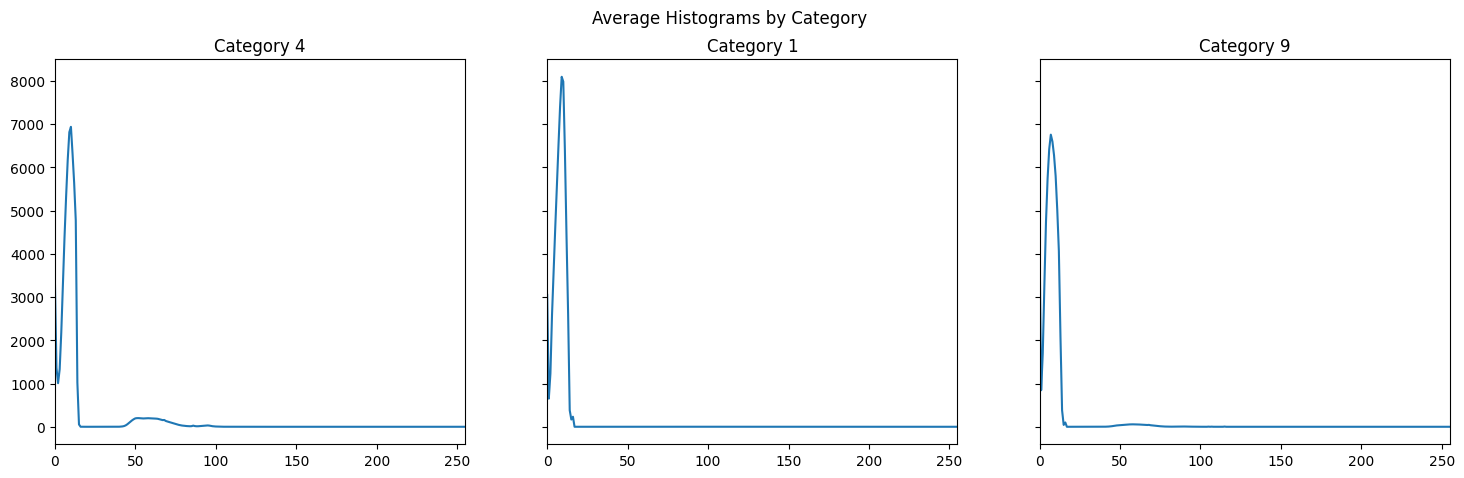

In [14]:
# Group images by category
images_by_category = {0: [], 1: [], 2: []}
for img, category in zip(image_list, zip_list):
    images_by_category[category].append(img)

# Calculate and plot histograms for each category
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
c = 0
cc = [4,1,9]
for category, images in images_by_category.items():
    # Aggregate histograms for the category
    aggregated_histogram = np.zeros(256)
    for img in images:
        hist, _ = np.histogram(img, bins=256, range=(0, 256))
        aggregated_histogram += hist
    aggregated_histogram /= len(images)  # Average histogram
    
    axes[category].plot(aggregated_histogram)
    axes[category].set_title(f'Category {cc[c]}')
    axes[category].set_xlim([0, 255])
    c+=1

plt.suptitle('Average Histograms by Category')
plt.show()